# Logistic Regression Analysis & K-Mean Cluster Analysis

**1. Getting data**

link : https://data.world/earino/churn/workspace/file?filename=churn.csv

In [25]:
# import library
library(tidyverse)
library(ggplot2)

In [26]:
# import data
churn_df <- read.csv("churn.csv", stringsAsFactors = TRUE)

In [27]:
head(churn_df)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
5,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
6,No,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


**2. Exploratory Data Analysis**

In [28]:

# Counting the number of missing values 

cat("Missing values =",sum(is.na(churn_df)))

Missing values = 0

In [29]:
# Explore data
glimpse(churn_df)

Rows: 5,000
Columns: 18
$ churn                      <fct> No, No, No, No, No, No, No, No, No, No, Yes…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> no, no, no, yes, yes, yes, no, yes, no, yes…
$ voicemailplan              <fct> yes, yes, no, no, no, no, yes, no, no, yes,…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

In [30]:
# summary statistics
summary(churn_df)

**Visualizing Statistics**

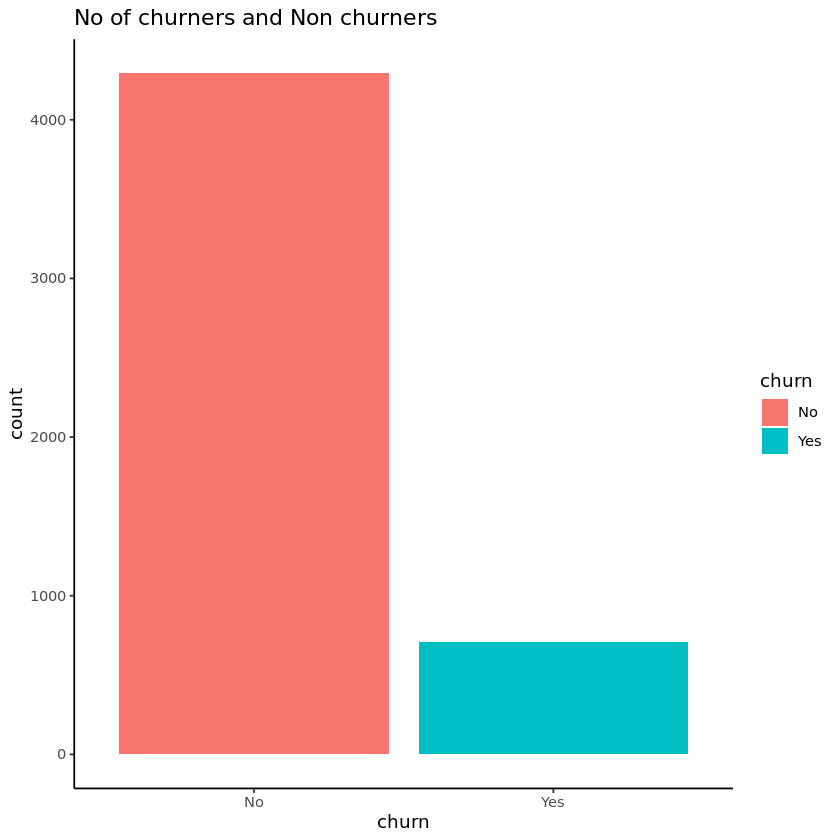

In [31]:
  # no. of churners and non churners
ggplot(churn_df, aes(churn, fill = churn)) +
  geom_bar() +
  labs(title = "No of churners and Non churners") +
  theme_classic()

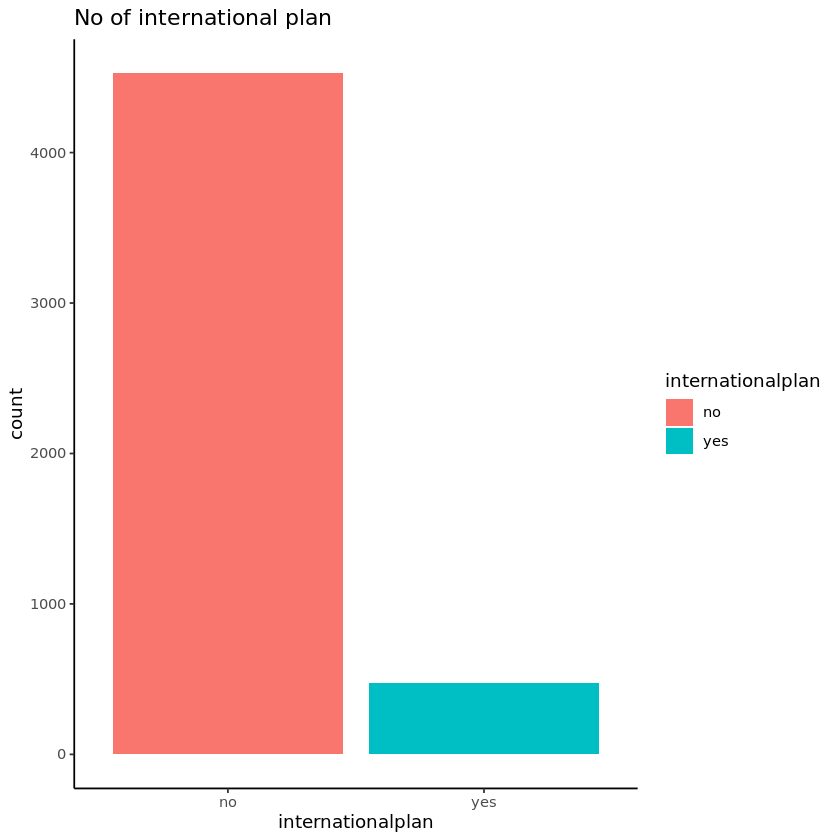

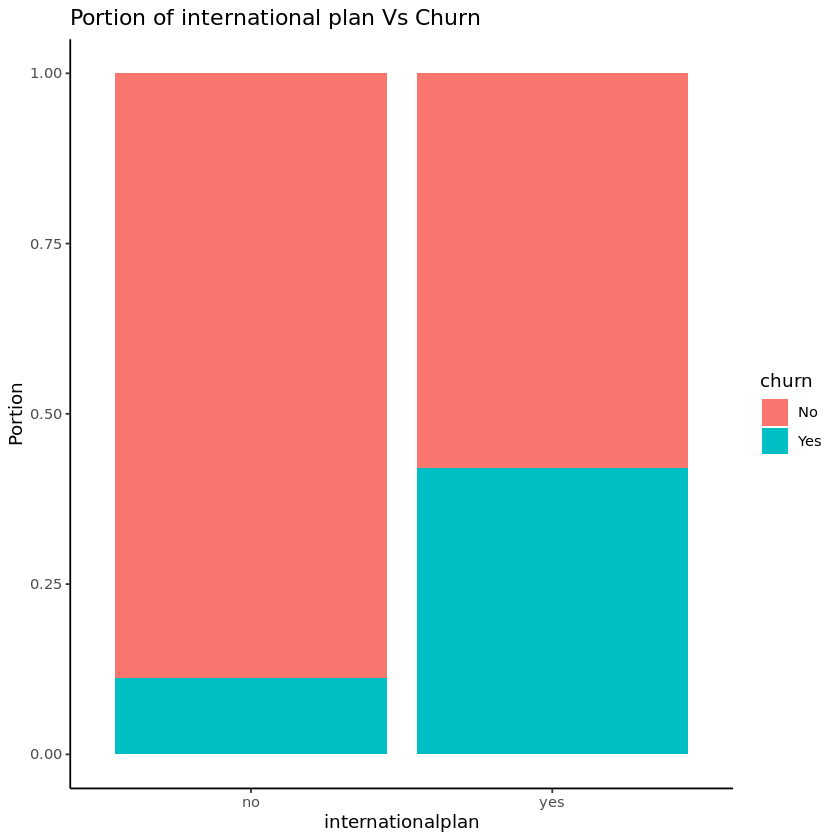

In [32]:
# No of international plan
ggplot(churn_df, aes(internationalplan , fill = internationalplan)) +
  geom_bar() +
  labs(title = "No of international plan") +
  theme_classic()
# Portion of international plan Vs Churn
ggplot(churn_df, aes(internationalplan , fill = churn)) +
  geom_bar(position =  "fill") +
  labs(title = "Portion of international plan Vs Churn", y = "Portion") +
  theme_classic()

**ลูกค้าที่มี international plan มีแนวโน้มที่จะ churn มากเกือบครึ่งนึง**

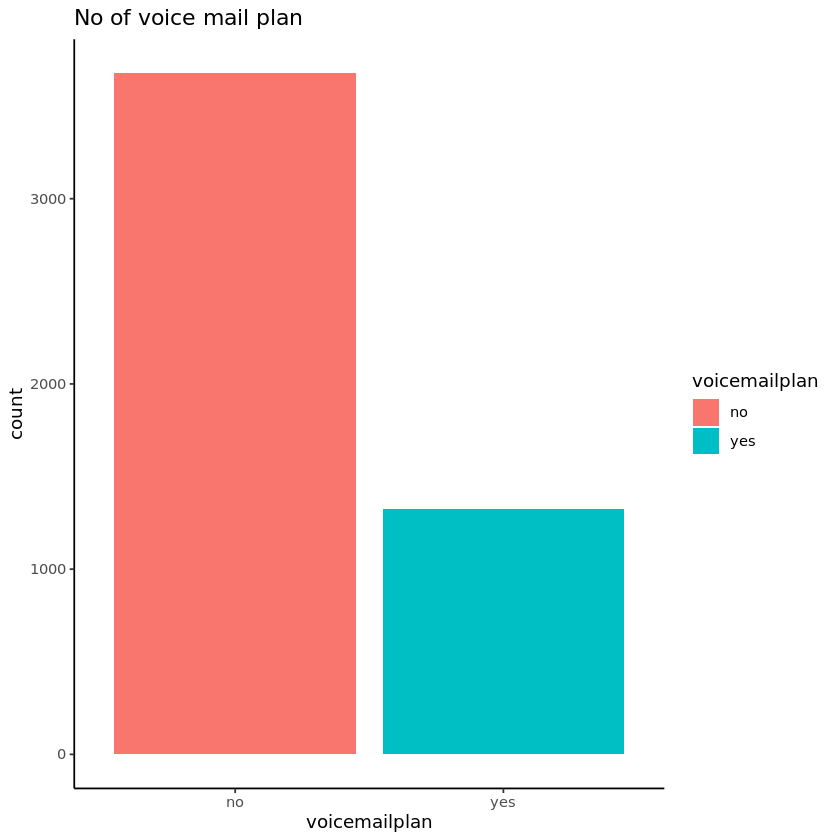

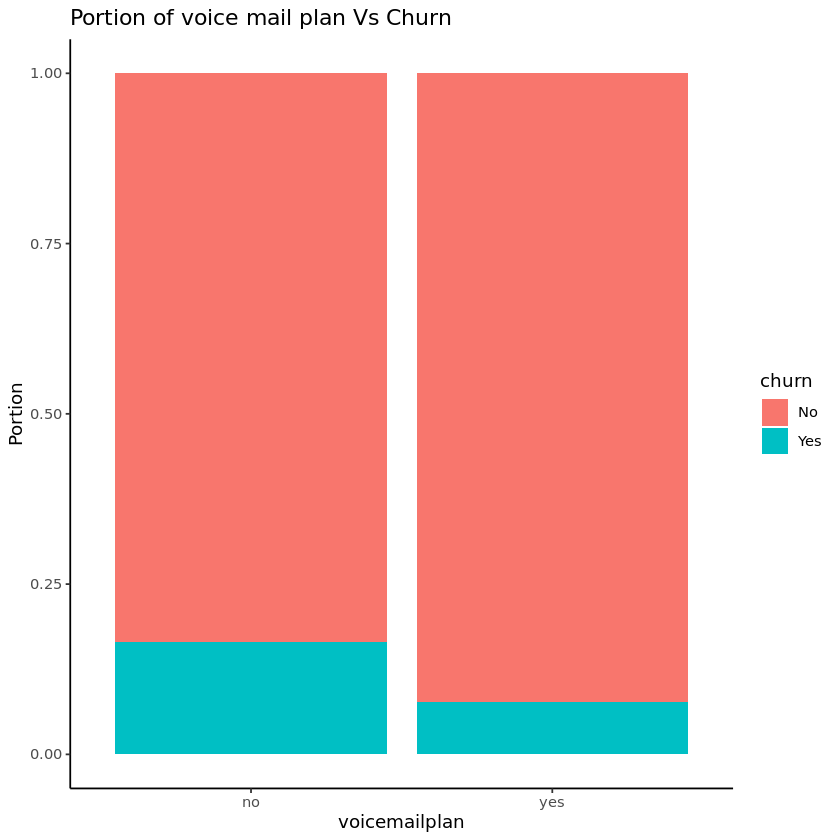

In [33]:
# no of voice mail plan
ggplot(churn_df, aes(voicemailplan , fill = voicemailplan)) +
  geom_bar() +
  labs(title = "No of voice mail plan") +
  theme_classic()
# Portion of voice mail plan Vs Churn
ggplot(churn_df, aes(voicemailplan , fill = churn)) +
  geom_bar(position =  "fill") +
  labs(title = "Portion of voice mail plan Vs Churn", y = "Portion") +
  theme_classic()

**ลูกค้าที่มี voice plan มีแนวโน้มที่จะ churn น้อย**

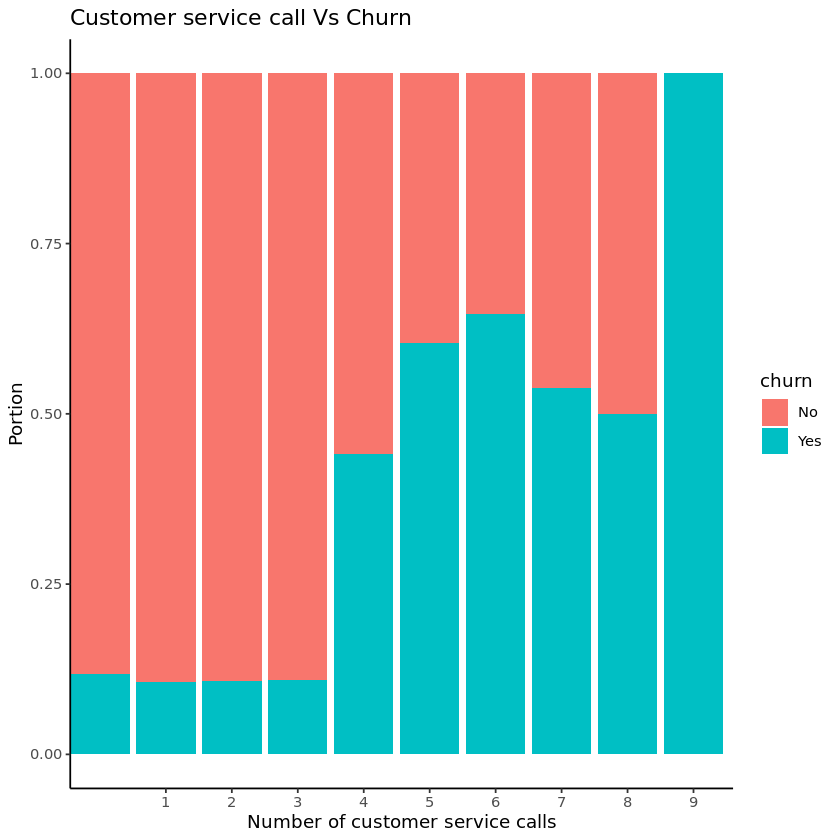

In [34]:
# Customer service call Vs Churn
ggplot(churn_df, aes(x = numbercustomerservicecalls , fill = churn)) +
  geom_bar(position = "fill") +
  labs( title = "Customer service call Vs Churn", y = "Portion", x= "Number of customer service calls") +
  scale_x_discrete(limits =(c("1","2","3","4","5","6","7","8","9")))+
  theme_classic()

**ลูกค้าที่โทรติดต่อฝ่ายดูแลลูกค้าตั้งแต่หมายเลข 4 ขึ้นไปมีแนวโน้มที่จะ churn สูง และลูกค้าที่ติดต่อหมายเลข 9 มีแนวโน้มที่จะ churn 100%**

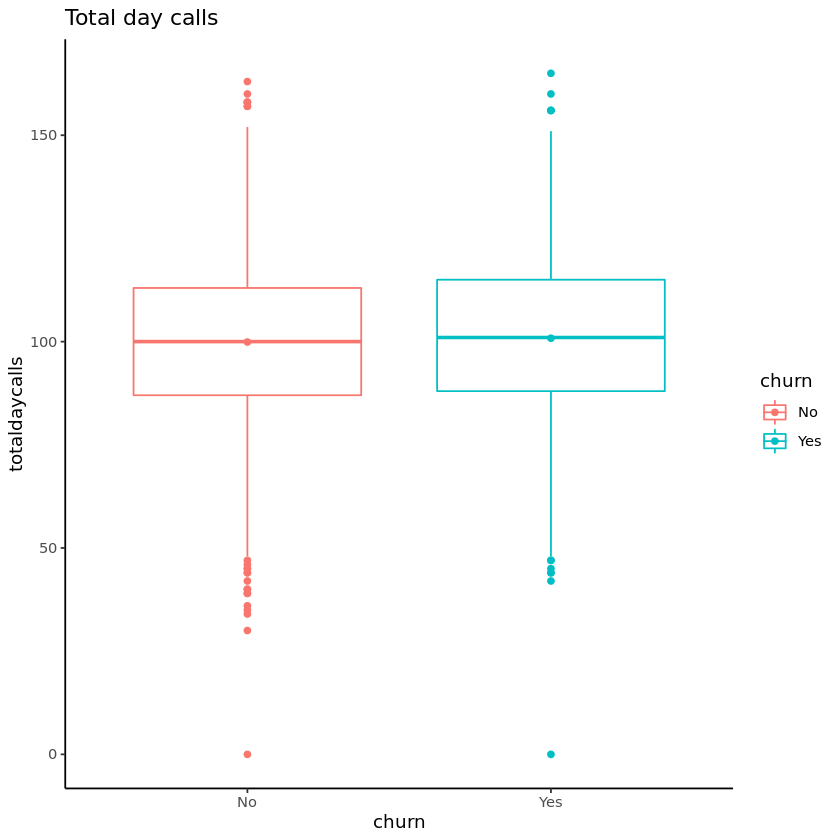

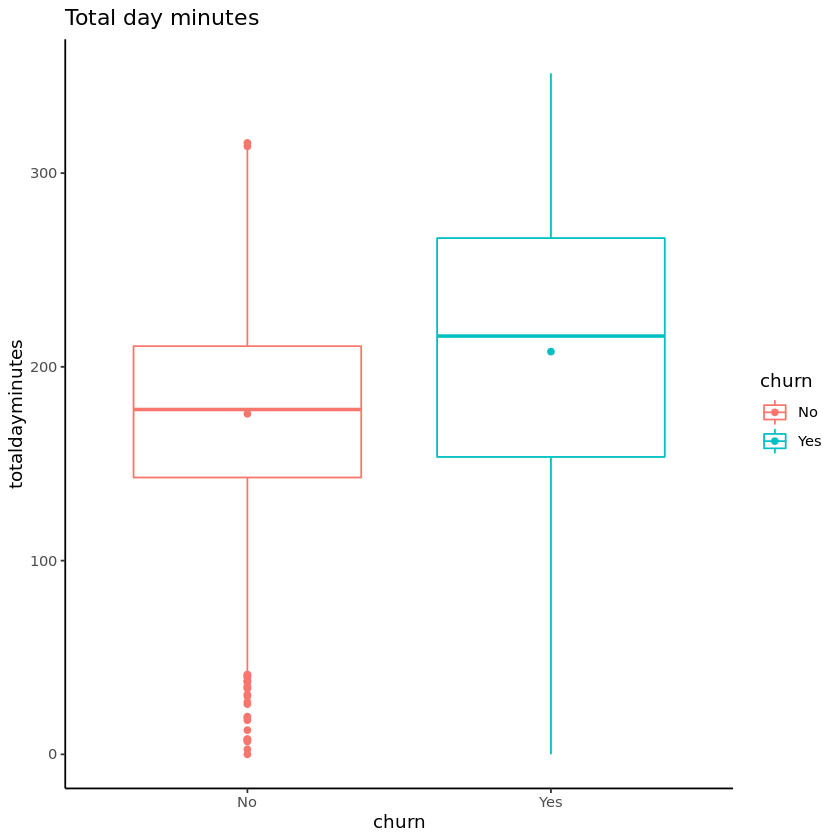

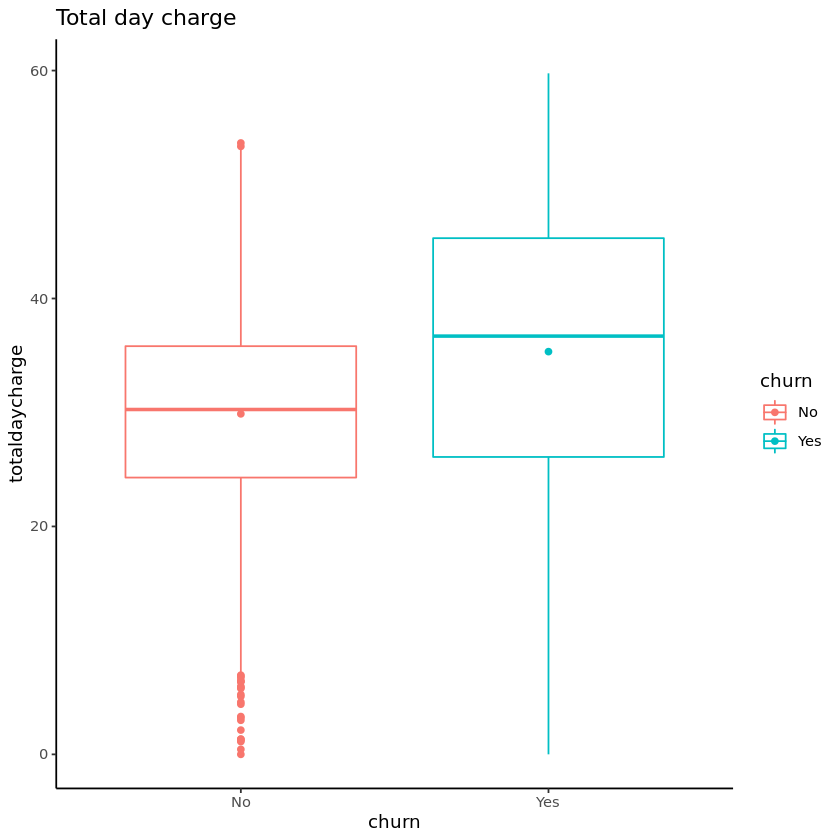

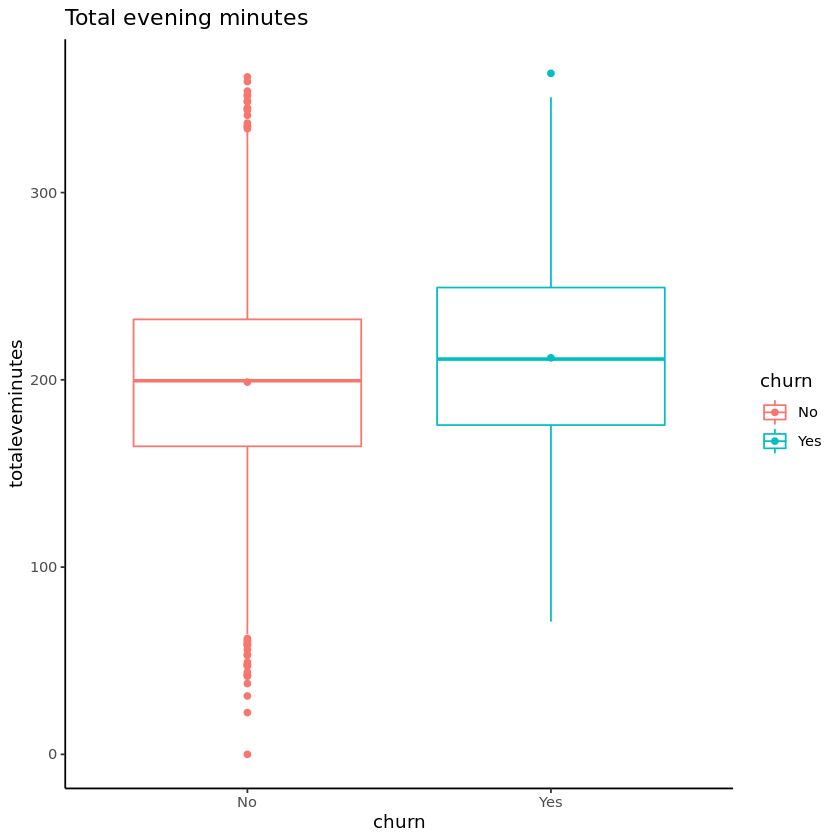

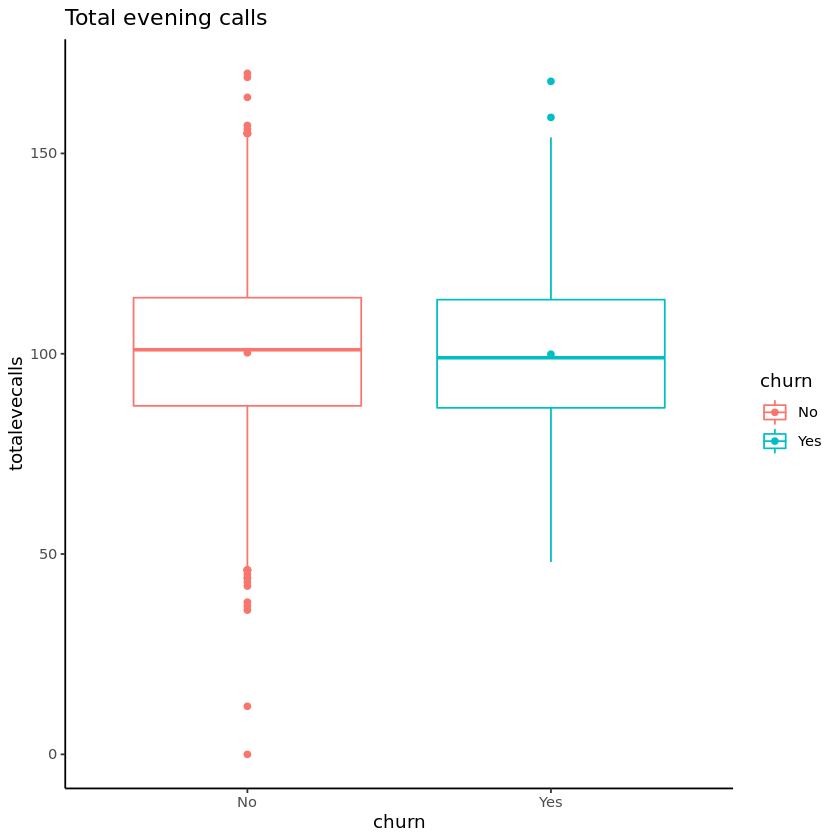

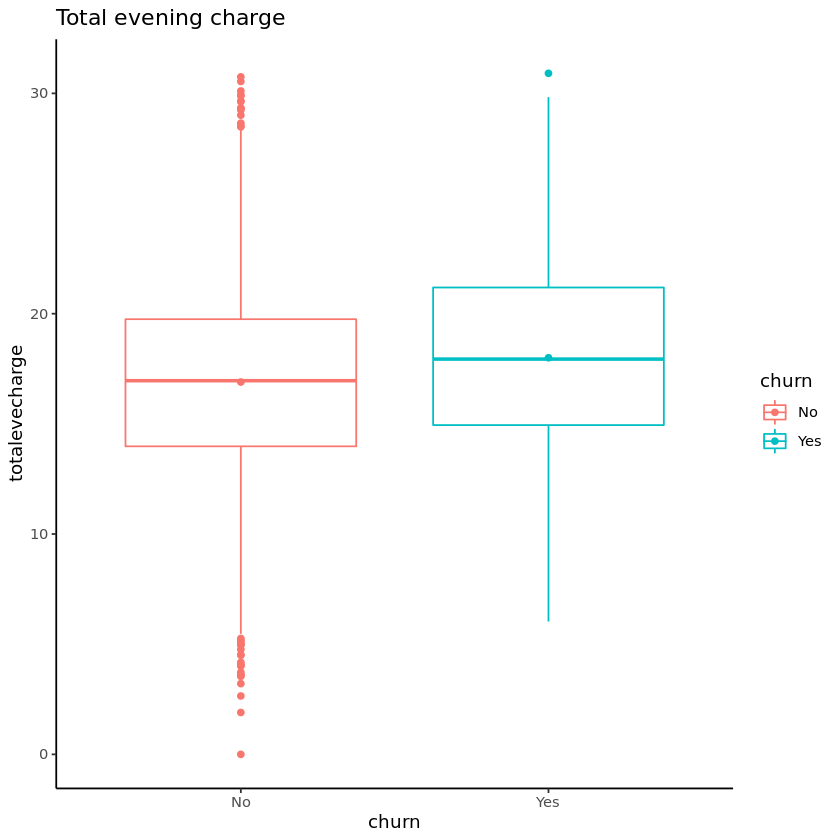

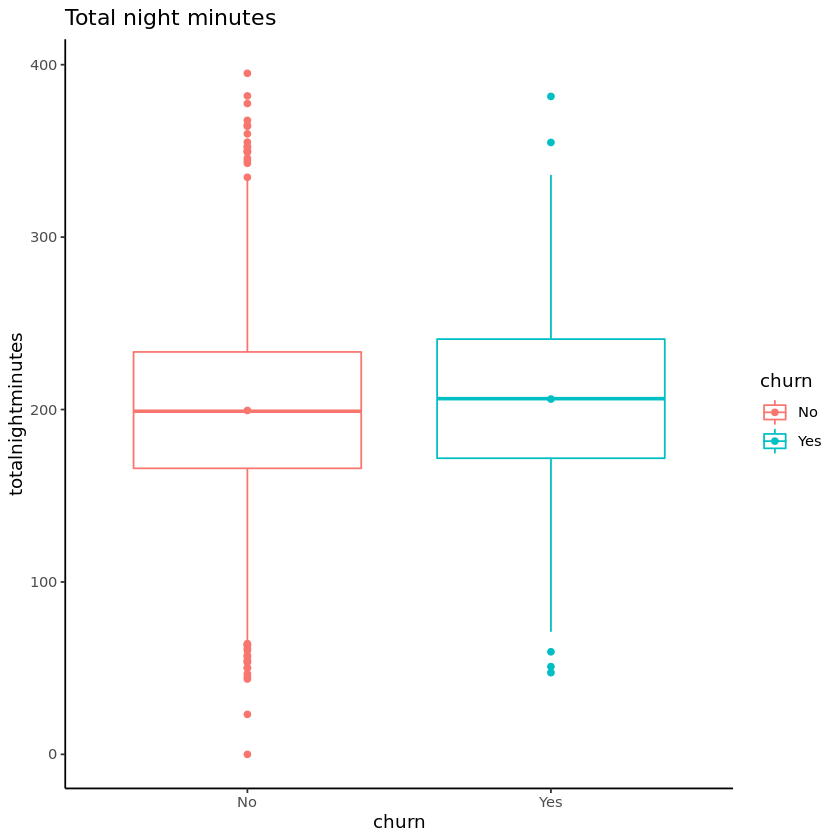

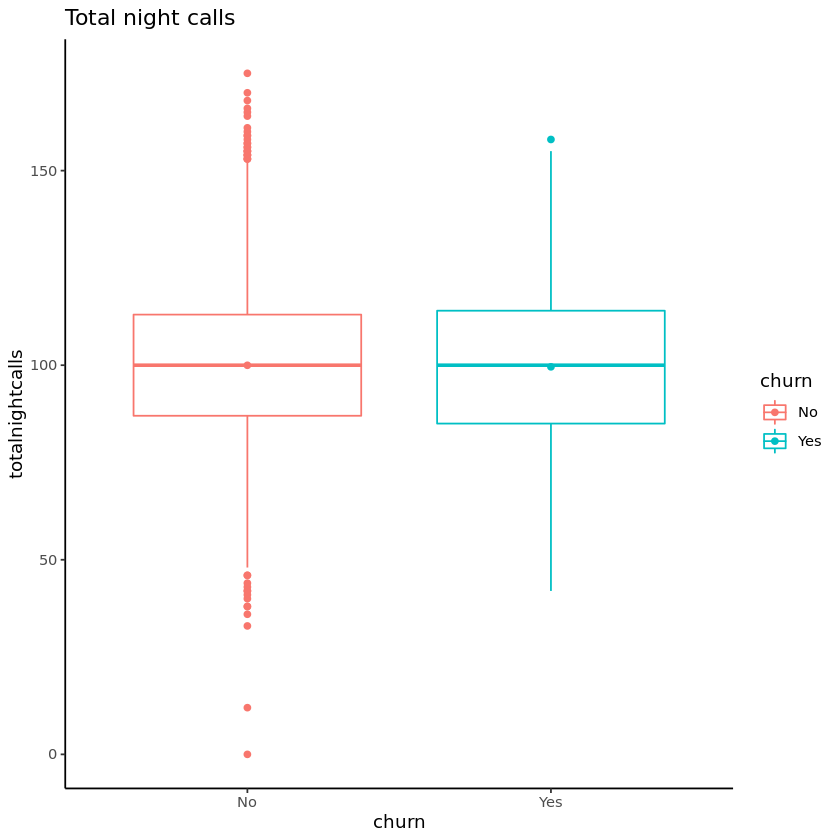

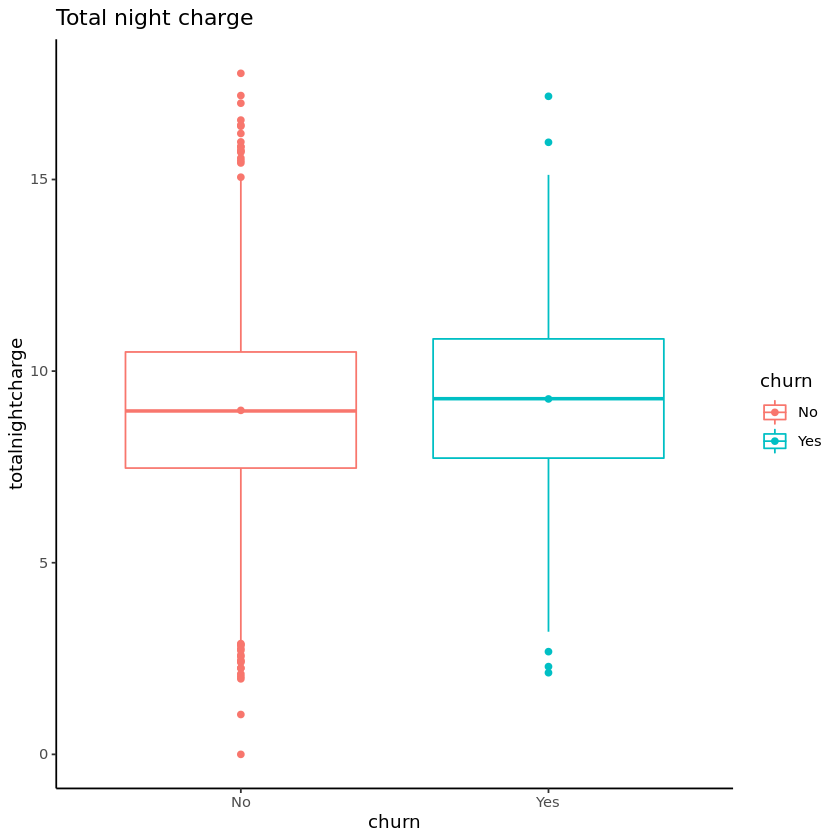

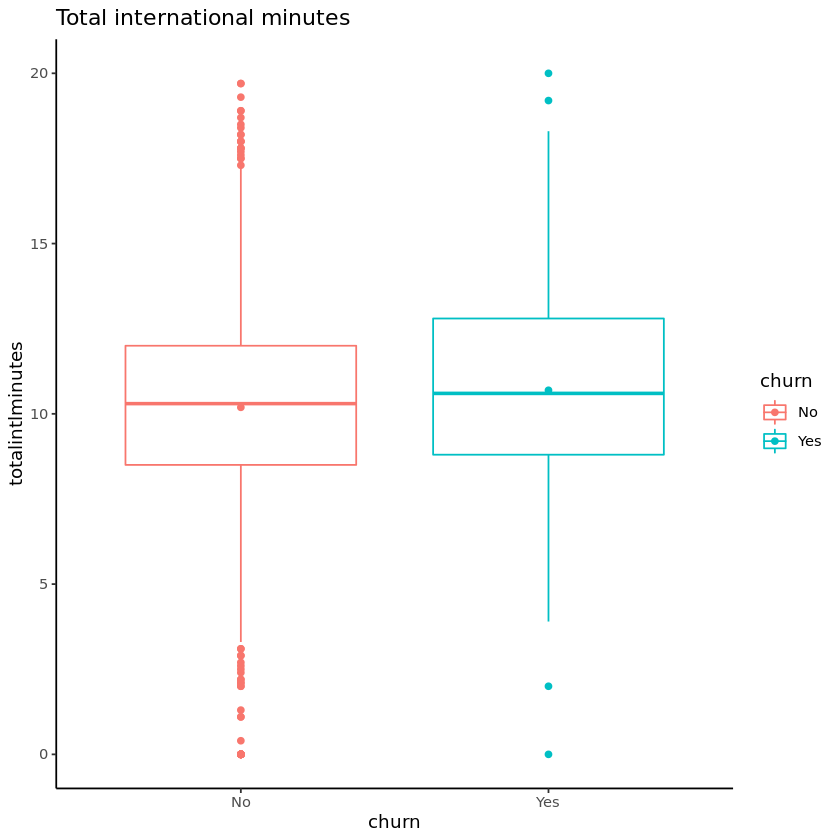

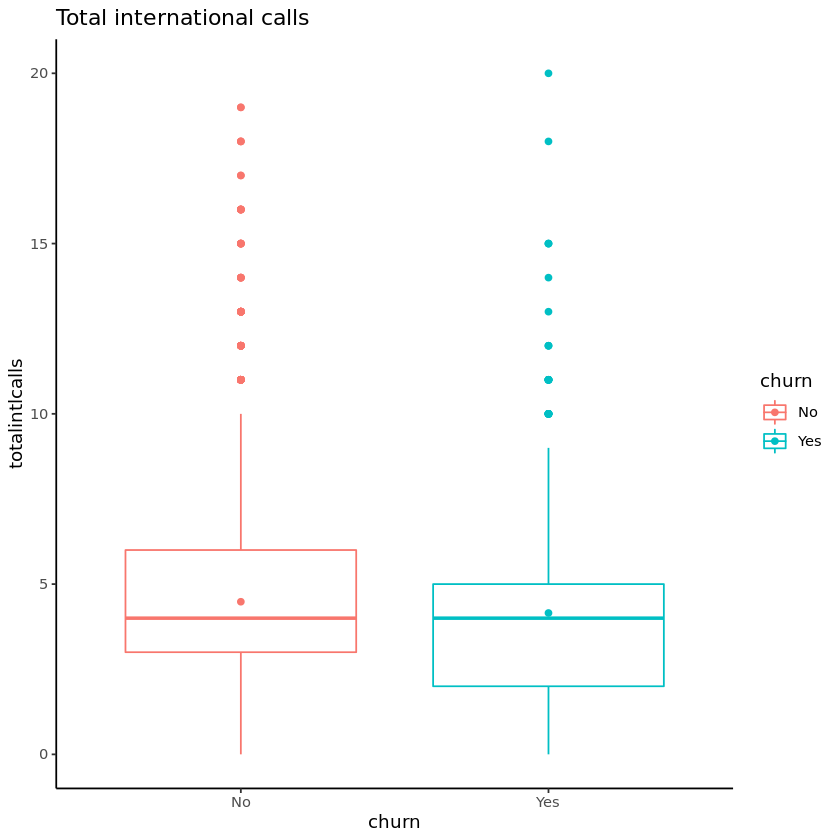

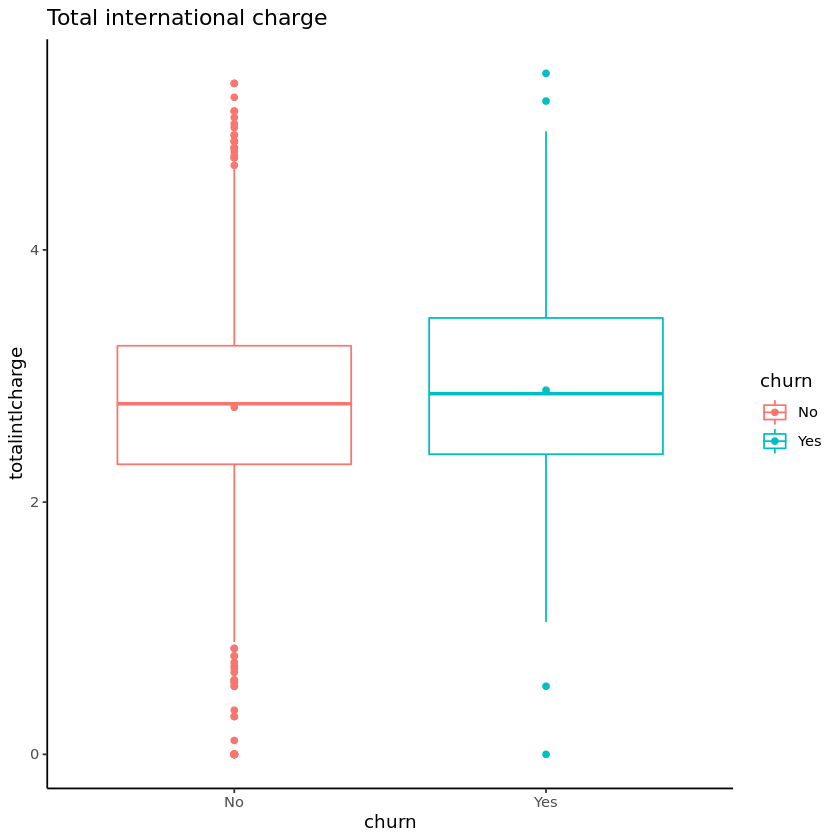

In [35]:
# check variables distribution of day
  ggplot(churn_df, aes(x= churn, y=totaldaycalls, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total day calls")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totaldayminutes, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total day minutes")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totaldaycharge, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point")+
    labs(title = "Total day charge")+
    theme_classic()

# check variables distribution of evening
  ggplot(churn_df, aes(x= churn, y=totaleveminutes, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total evening minutes")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalevecalls, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total evening calls")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalevecharge, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point")+
    labs(title = "Total evening charge")+
    theme_classic()

# check variables distribution of night
  ggplot(churn_df, aes(x= churn, y=totalnightminutes, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total night minutes")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalnightcalls, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total night calls")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalnightcharge, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point")+
    labs(title = "Total night charge")+
    theme_classic()

# check variables distribution of international
  ggplot(churn_df, aes(x= churn, y=totalintlminutes, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total international minutes")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalintlcalls, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total international calls")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalintlcharge, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point")+
    labs(title = "Total international charge")+
    theme_classic()

In [36]:
# convert data to factor - 0 not churn ,1 is churn
churn_df <- churn_df %>%
  mutate(churn = ifelse(churn == "No", 0, 1),
         internationalplan = ifelse(internationalplan == "no",0,1),
         voicemailplan = ifelse(voicemailplan == "no",0,1)) %>%
  mutate(across(c(churn, internationalplan, voicemailplan), as.factor))

In [37]:
# create totalminutes, totalcalls, totalcharge
churn_df <- churn_df %>%
  mutate(totalminutes = totaldayminutes+totaleveminutes+totalnightminutes,
         totalcalls = totaldaycalls+totalevecalls+totalnightcalls,
         totalcharge = totaldaycharge+totalevecharge+totalnightcharge)

In [38]:
# Explore data
glimpse(churn_df)

Rows: 5,000
Columns: 21
$ churn                      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0…
$ voicemailplan              <fct> 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

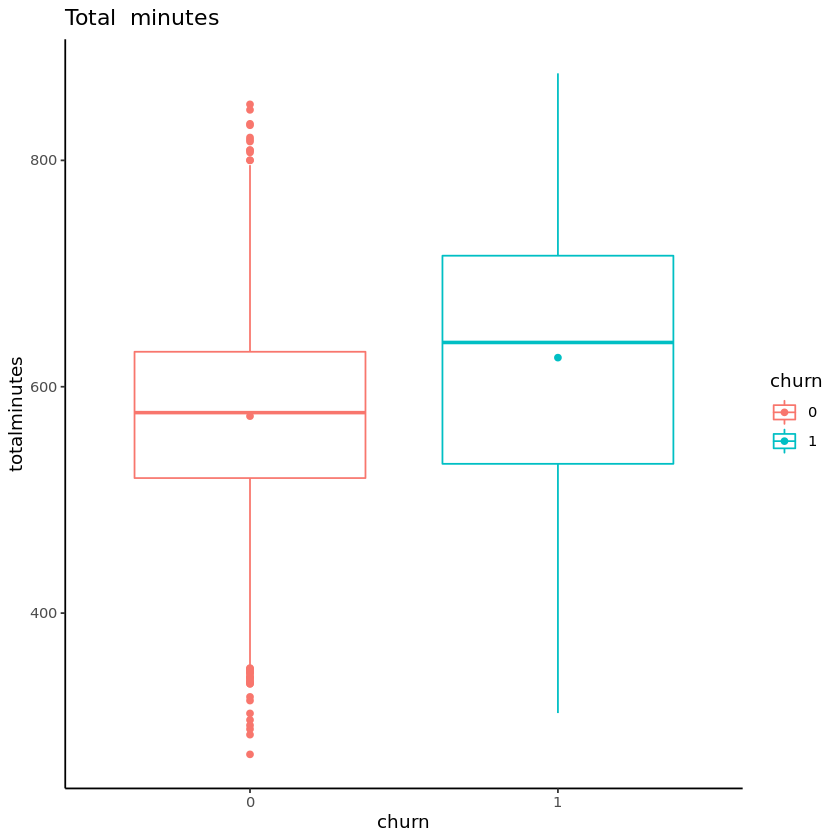

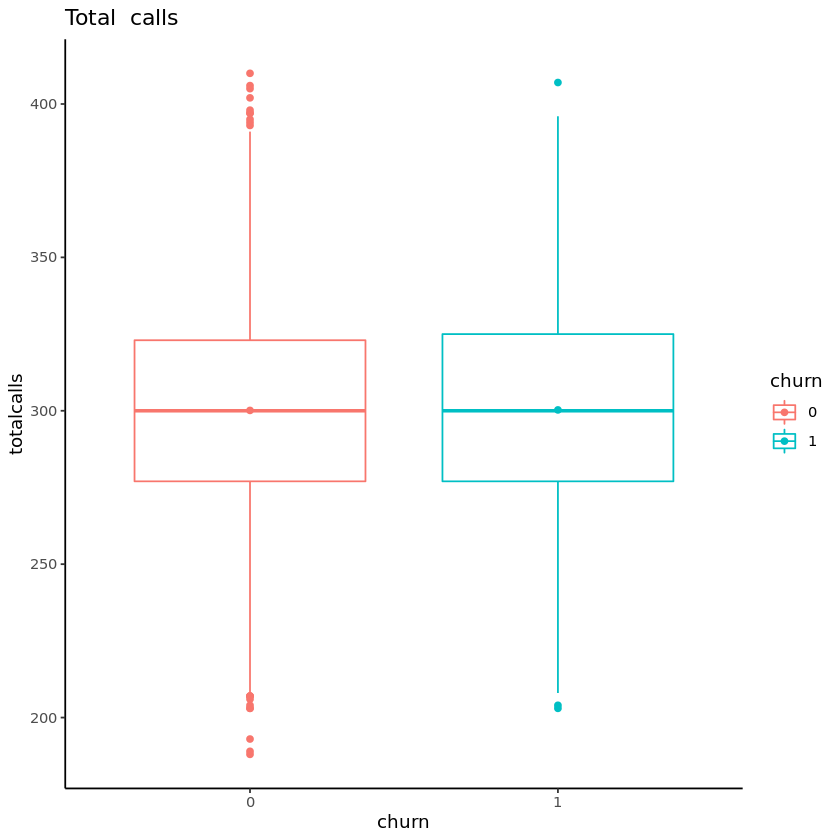

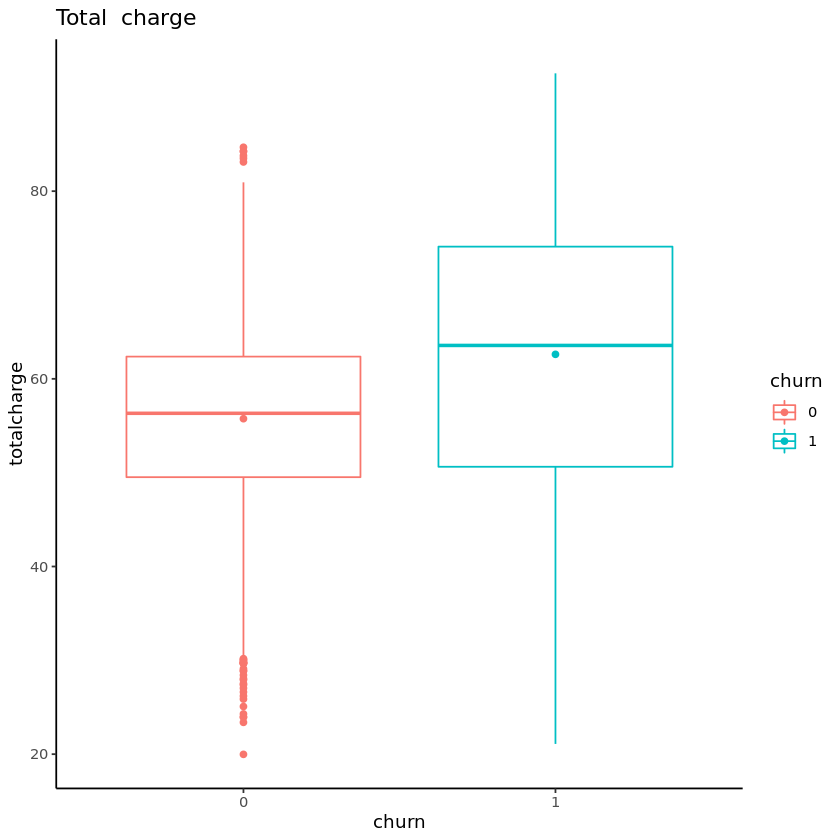

In [39]:
# box plot of totalminutes, totalcalls, totalcharge
  ggplot(churn_df, aes(x= churn, y=totalminutes, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total  minutes")+
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalcalls, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point") +
    labs(title = "Total  calls") +
    theme_classic()
  
  ggplot(churn_df, aes(x= churn, y=totalcharge, color = churn)) +
    geom_boxplot()+
    stat_summary(fun = mean, geom = "point")+
    labs(title = "Total  charge") +
    theme_classic()

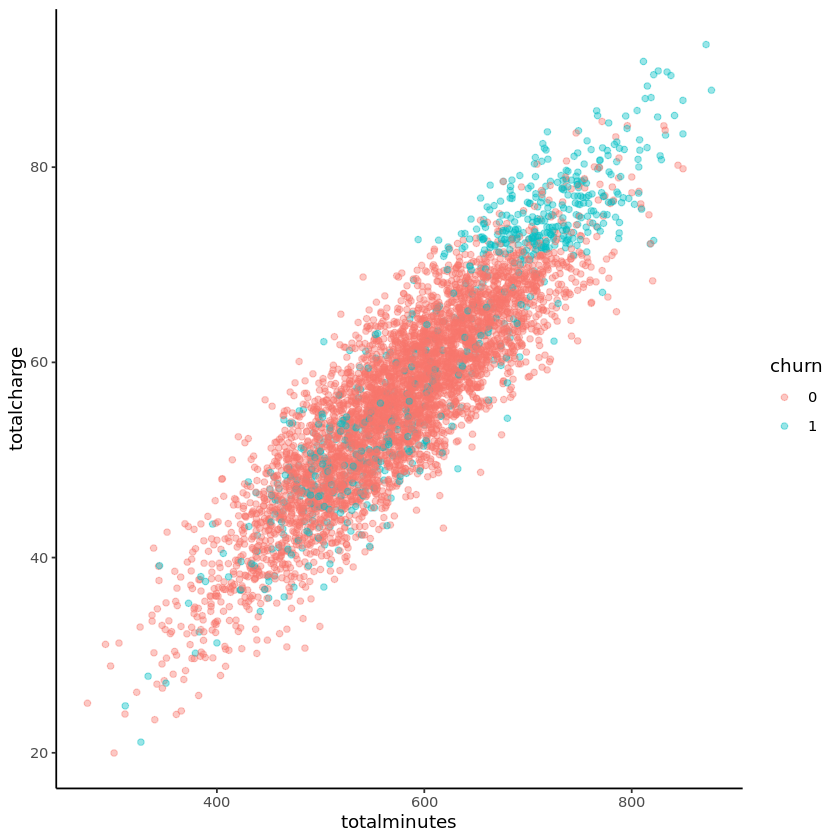

In [40]:
# relationship between total minutes and total charge
ggplot(churn_df, aes(totalminutes, totalcharge, color = churn)) +
  geom_point(position = "jitter", alpha = 0.4)+
  theme_classic()

**3. Model building**

1. Split the data to train and test sets

In [41]:
# Split the data to train and test sets
set.seed(90)
n <- nrow(churn_df)
split <- sample(1:n, size = n*0.7)
train <- churn_df[split,]
test <- churn_df[-split,]

2. Calculate the baseline accuracy

In [42]:
# Calculate the baseline accuracy
cat("Baseline accuracy")
prop.table(table(train$churn))

Baseline accuracy


        0         1 
0.8611429 0.1388571 

3. Fitting the model

In [43]:
# Fitting the model
glm_model <- glm(churn ~ ., data = train, family = "binomial")
  # model summary on all variable
summary(glm_model)


Call:
glm(formula = churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0901  -0.4992  -0.3276  -0.1865   3.3258  

Coefficients: (3 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -8.831e+00  7.164e-01 -12.328  < 2e-16 ***
accountlength               1.067e-03  1.380e-03   0.774  0.43918    
internationalplan1          2.026e+00  1.469e-01  13.792  < 2e-16 ***
voicemailplan1             -2.418e+00  6.080e-01  -3.978 6.96e-05 ***
numbervmailmessages         4.204e-02  1.869e-02   2.249  0.02451 *  
totaldayminutes             2.654e+00  3.280e+00   0.809  0.41845    
totaldaycalls               2.718e-03  2.769e-03   0.982  0.32633    
totaldaycharge             -1.553e+01  1.929e+01  -0.805  0.42098    
totaleveminutes            -9.984e-01  1.633e+00  -0.611  0.54098    
totalevecalls              -3.725e-03  2.822e-03  -1.320  0.186

In [44]:
  # model summary on statistically significant variables
glm_model <- glm(churn ~ internationalplan + voicemailplan + numbervmailmessages + totalintlcalls + numbercustomerservicecalls, data = train, family = "binomial")
summary(glm_model)


Call:
glm(formula = churn ~ internationalplan + voicemailplan + numbervmailmessages + 
    totalintlcalls + numbercustomerservicecalls, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6887  -0.5414  -0.4213  -0.2856   2.9512  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.41584    0.13812 -17.490  < 2e-16 ***
internationalplan1          1.88787    0.13425  14.062  < 2e-16 ***
voicemailplan1             -2.19140    0.56390  -3.886 0.000102 ***
numbervmailmessages         0.03987    0.01734   2.300 0.021461 *  
totalintlcalls             -0.06462    0.02314  -2.793 0.005223 ** 
numbercustomerservicecalls  0.42628    0.03618  11.783  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2820.2  on 3499  degrees of freedom
Residual deviance: 2448.1  on 3494  d

5. Train Model Evaluation - confusion matrix

In [55]:
# Train Model Evaluation - confusion matrix 
train_matrix <- table(train$churn, train$predicted, dnn = c("Actual", "Prediected"))
print(train_matrix)
TP <- train_matrix[2,2]
FP <- train_matrix[1,2]
FN <- train_matrix[2,1]
TN <- train_matrix[1,1]

train_accuracy <- (TP + TN) / (TP+FP+FN+TN)
train_precision <- TP / (TP+FP)
train_recall <- TP / (TP+FN)
train_f1score <- 2*(train_precision*train_recall) / (train_precision+train_recall)
cat("\nTrain Model Evaluation",
    "\nAccuracy: ",train_accuracy,
    "\nRecall:   ",train_recall,
    "\nPrecision:",train_precision,
    "\nF1-Score: ", train_f1score)

ERROR: ERROR: Error in table(train$churn, train$predicted, dnn = c("Actual", "Prediected")): all arguments must have the same length


6.Testing model

In [46]:
# Testing model
test$probability <- predict(glm_model, newdata = test, type = "response")
test$predicted <- ifelse(test$probability >= 0.5, 1, 0)

In [47]:
# Test accuracy
cat("Test Accuracy : ",mean(test$churn == test$predicted) )

Test Accuracy :  0.862

7. Test Model Evaluation - confusion matrix

In [48]:
# Test Model Evaluation - confusion matrix
train_matrix <- table(test$churn, test$predicted, dnn = c("Actual", "Prediected"))
print(train_matrix)
TP <- train_matrix[2,2]
FP <- train_matrix[1,2]
FN <- train_matrix[2,1]
TN <- train_matrix[1,1]

test_accuracy <- (TP + TN) / (TP+FP+FN+TN)
test_precision <- TP / (TP+FP)
test_recall <- TP / (TP+FN)
test_f1score <- 2*(test_precision*test_recall) / (test_precision+test_recall)
cat("\nTest Model Evaluation",
    "\nAccuracy: ",test_accuracy,
    "\nRecall:   ",test_recall,
    "\nPrecision:",test_precision,
    "\nF1-Score: ", test_f1score)

      Prediected
Actual    0    1
     0 1266   13
     1  194   27

Test Model Evaluation 
Accuracy:  0.862 
Recall:    0.1221719 
Precision: 0.675 
F1-Score:  0.2068966

**3.2 K-Mean Cluster Analysis**

1. Explore data

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



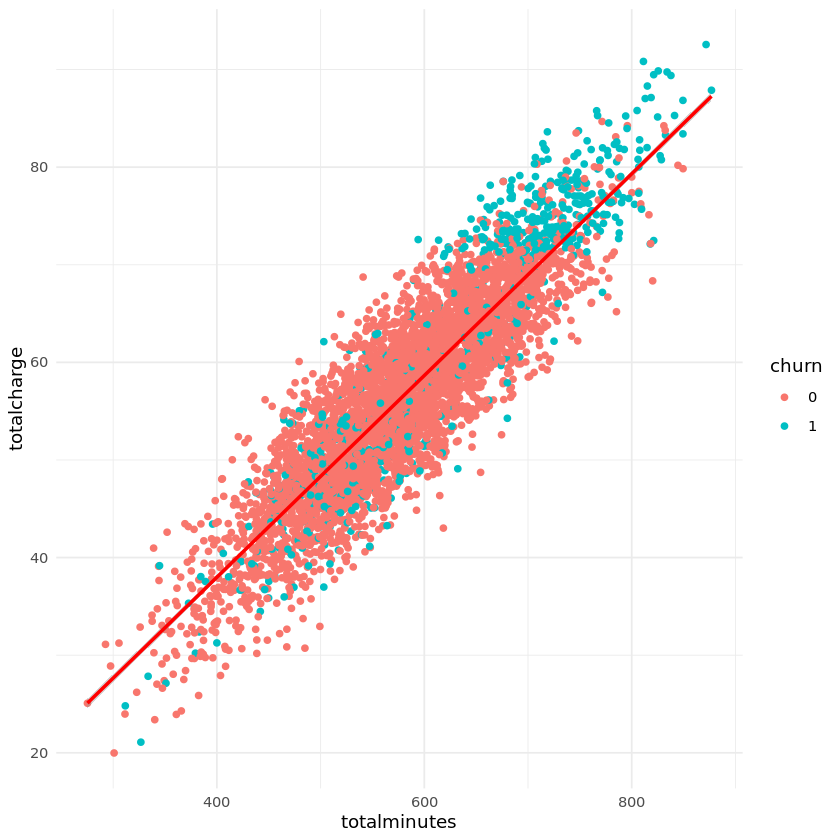

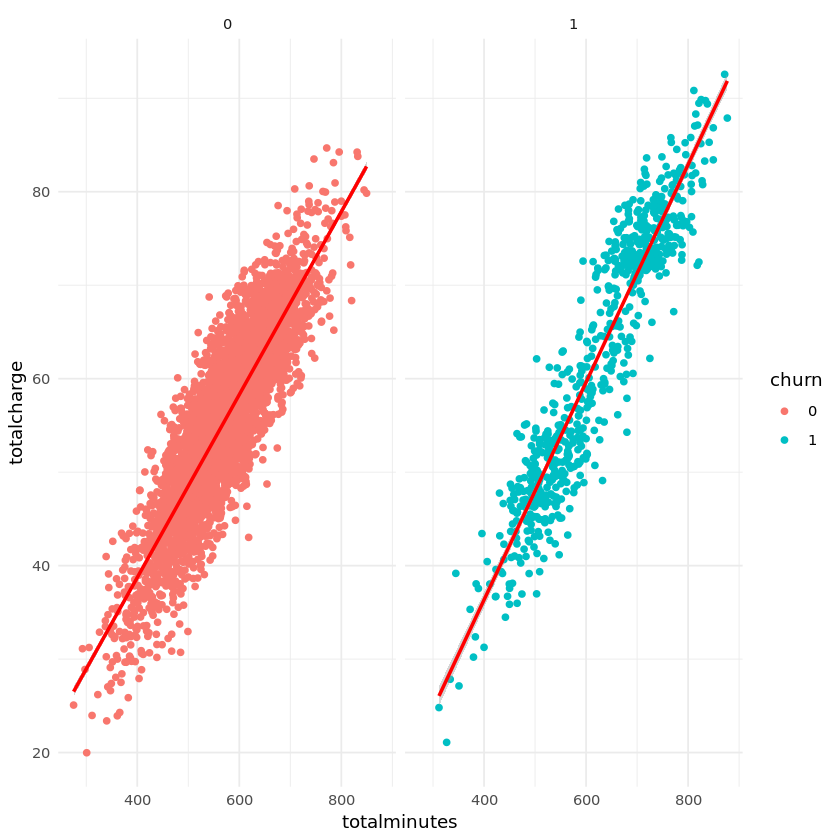

In [56]:
## Explore data
  #totalminutes and totalcharge
ggplot(churn_df, aes(totalminutes, totalcharge, color = churn)) +
  geom_point(position = "jitter") +
  geom_smooth(method = "lm", color = "red")+
  theme_minimal()
  
ggplot(churn_df, aes(totalminutes, totalcharge, color = churn)) +
  geom_point(position = "jitter") +
  geom_smooth(method = "lm", color = "red") +
  facet_wrap(~churn)+
  theme_minimal()

2. Fit K-mean Model

In [50]:
# k = 2:5
# for loop k from 2 to 5
churn_df2 <- churn_df 
km_models <- list()
set.seed(42)
for (k in 2:5){
  model <- kmeans(churn_df2[, 1:21 ], centers = k)
  km_models[[k]] <- model
}

3. model result

In [51]:
## see model result
summary(km_models)

churn_df2 <- churn_df2 %>%
  mutate(k2 = km_models[[2]]$cluster,
         k3 = km_models[[3]]$cluster,
         k4 = km_models[[4]]$cluster,
         k5 = km_models[[5]]$cluster)

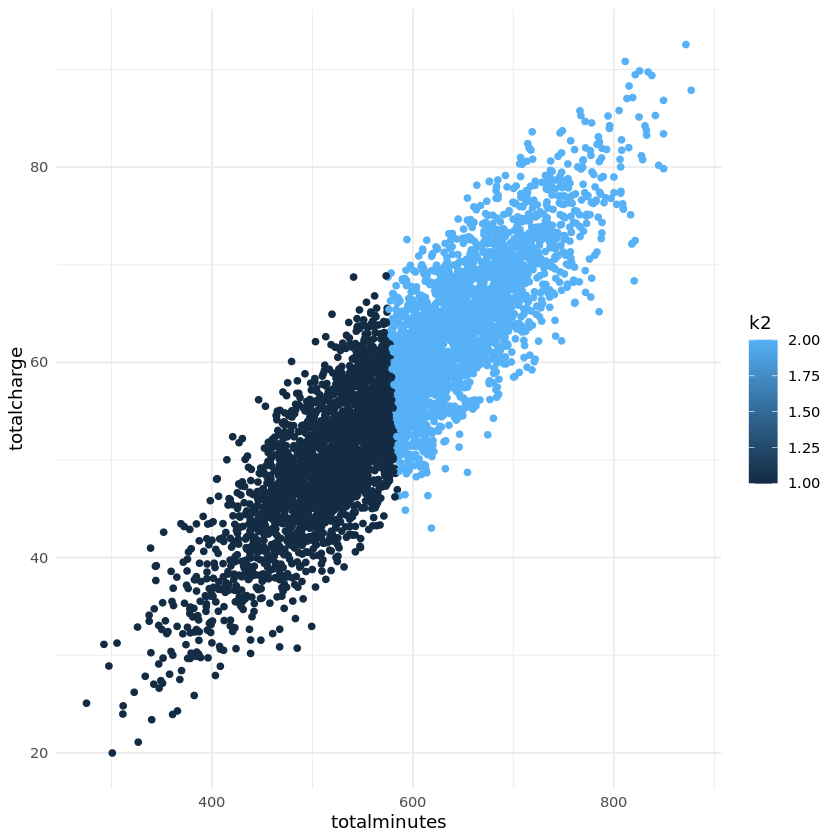

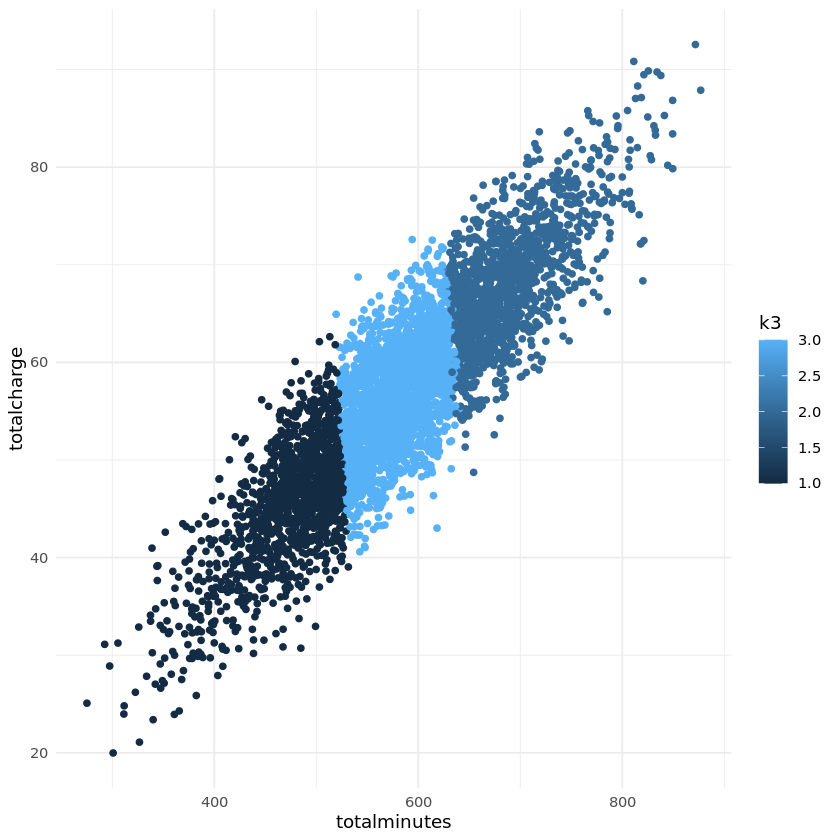

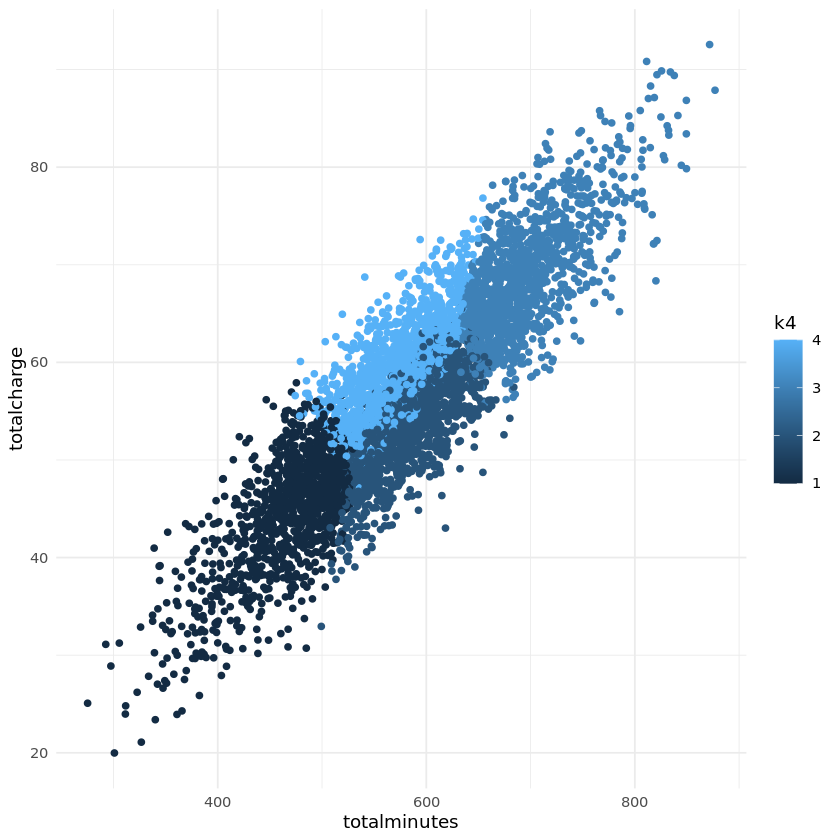

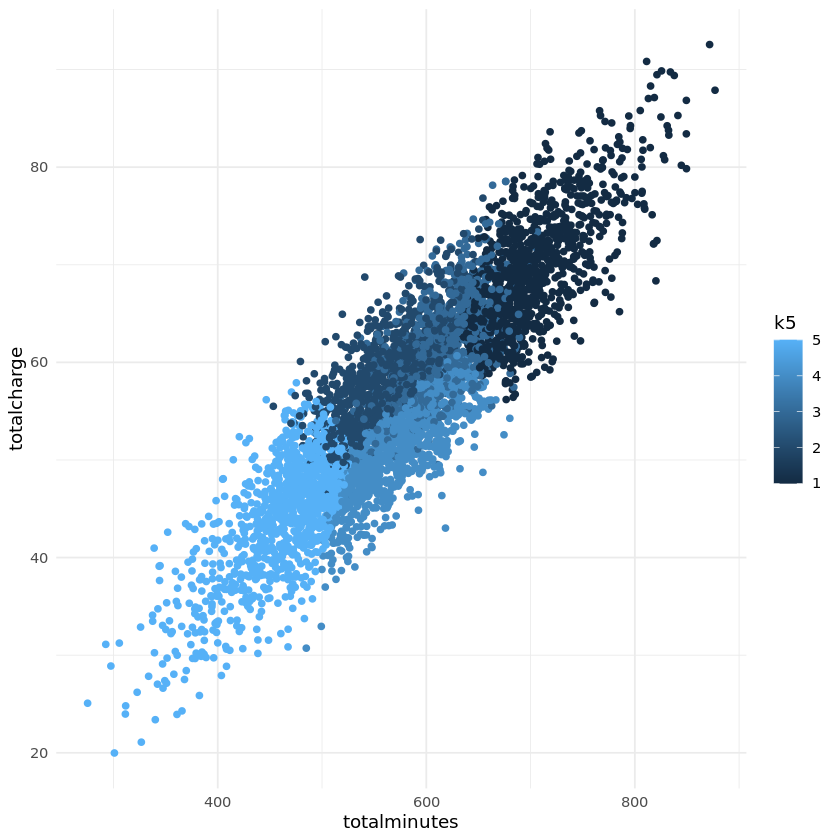

In [52]:
ggplot(churn_df2, aes(totalminutes, totalcharge, col = k2))+
  geom_point()+
  theme_minimal()
ggplot(churn_df2, aes(totalminutes, totalcharge, col = k3))+
  geom_point()+
  theme_minimal()
ggplot(churn_df2, aes(totalminutes, totalcharge, col = k4))+
  geom_point()+
  theme_minimal()
ggplot(churn_df2, aes(totalminutes, totalcharge, col = k5))+
  geom_point()+
  theme_minimal()

0 = not churn 
1 = is churn

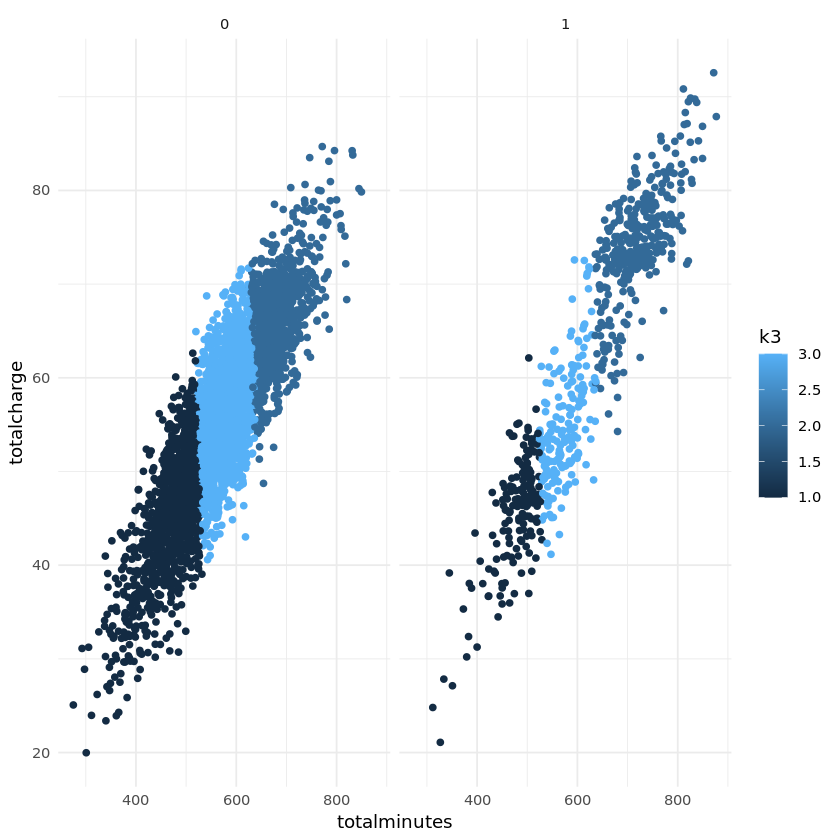

In [53]:
ggplot(churn_df2, aes(totalminutes, totalcharge, col = k3))+
  geom_point()+
  theme_minimal()+
  facet_wrap(~churn)
cat("0 = not churn",
    "\n1 = is churn") 